In [56]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    plot_confusion_matrix,
    make_scorer,
    recall_score
)

In [2]:
data = pd.read_csv("backpain.csv")

In [3]:
data.shape

(310, 13)

In [4]:
data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


## Load the dataset and identify the variables that have a correlation greater than or equal to 0.7 with the ‘pelvic_incidence’ variable?

<AxesSubplot:>

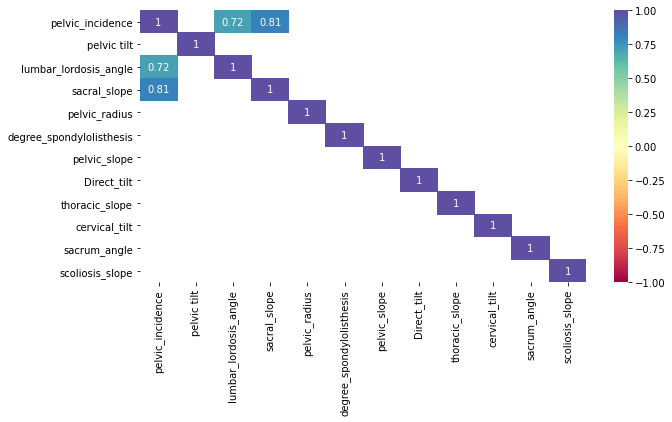

In [5]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    data.corr()[data.corr() >= 0.7], annot=True, vmax=1, vmin=-1, cmap="Spectral"
)

## Encode Status variable: Abnormal class to 1 and Normal to 0.

Split the data into a 70:30 ratio(Without stratification). What is the percentage of 0 and 1 classes in the test data (y_test)?

Note - Do not use stratify on the dataset.

In [6]:
data["Status"] = data["Status"].apply(lambda x: 1 if x == "Abnormal" else 0)

In [7]:
data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [83]:
X = data.drop(["Status"], axis=1)
Y = data[["Status"]]

In [84]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [85]:
y_test.value_counts(normalize=True)

Status
1         0.709677
0         0.290323
dtype: float64

In [86]:
y_train.head()

,Status
67,1
283,0
122,1
34,1
197,1


## Which metric is the most appropriate metric to evaluate the model according to the problem statement?

Recall: Predicting a person doesn't have an abnormal spine and a person has an abnormal spine - A person who needs treatment will be missed. Hence, reducing such false negatives is important

## Build a logistic regression model with default parameters and select the correct option

In [35]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [36]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

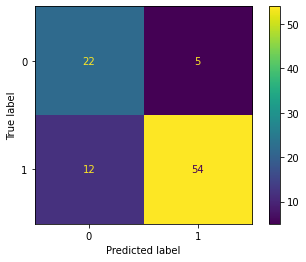

In [122]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [114]:
    print("Recall on training set : ",metrics.recall_score(y_train,model.predict(X_train)))
    print("Recall on test set : ",metrics.recall_score(y_test,model.predict(X_test)))

Recall on training set :  1.0
Recall on test set :  0.8181818181818182
